# QSOs with DECaLS DR3 & SDSS/BOSS DR12
by Stephanie Juneau (NOAO) and the NOAO Data Lab Team

We use the DECaLS+WISE photometry jointly with SDSS/BOSS+WISE QSO spectroscopy table (DR12Q) in order to investigate QSO parameters, and compare QSO magnitudes and colors. Several extensions/hack ideas are possible from this starting point.

The columns from the DECaLS table used (Tractor, pre-matched to DR12Q) can be seen here: http://datalab.noao.edu/tutdev/query.php?name=ls_dr3.dr3_dr12q

The columns from the SDSS/BOSS DR12Q table (Paris et al 2015) can be seen here: http://datalab.noao.edu/tutdev/query.php?name=sdss_dr13.dr12qso

*Acknowledgements:* SJ thanks Bela Abolfathi (UCI) for developing another notebook with joint analysis of DECaLS and SDSS/BOSS spectroscopy tables.

## Import

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from dl import helpers

## Authenticate

In [19]:
Q = helpers.Querist('anonymous')
print 'Done getting token'

Done getting token


## Joint Query

In [68]:
# Query DR3 data and join on SDSS data
query = """
SELECT l.ra AS l_ra,l.dec AS l_dec,
 l.decam_flux_2 AS l_gflux,l.decam_flux_3 AS l_rflux,l.decam_flux_5 AS l_zflux,
 l.wise_flux_1 AS l_w1, l.wise_flux_2 AS l_w2, l.wise_flux_3 AS l_w3, l.wise_flux_4 AS l_w4, 
 l.decam_mw_transmission_2 AS l_trans2, l.decam_mw_transmission_3 AS l_trans3,
 l.decam_mw_transmission_5 AS l_trans5, 
 l.wise_mw_transmission_1 AS l_transw1, l.wise_mw_transmission_2 AS l_transw2, 
 l.wise_mw_transmission_3 AS l_transw3, l.wise_mw_transmission_4 AS l_transw4, 
 l.decam_flux_2*sqrt(l.decam_flux_ivar_2) as snr_g, 
 l.decam_flux_3*sqrt(l.decam_flux_ivar_3) as snr_r, 
 l.decam_flux_5*sqrt(l.decam_flux_ivar_5) as snr_z, 
 l.wise_flux_1*sqrt(l.wise_flux_ivar_1) as snr_w1, 
 l.wise_flux_2*sqrt(l.wise_flux_ivar_2) as snr_w2, 
 s.w1mag AS s_w1mag, s.w2mag AS s_w2mag, s.z_pca AS s_z_pca, s.z_pipe AS s_z_pipe, 
 s.psfmag_g AS s_gmag, s.psfmag_r AS s_rmag, s.psfmag_z AS s_zmag 
FROM ls_dr3.dr3_dr12q l 
INNER JOIN sdss_dr13.dr12qso s ON l.obj_id_dr12 = s.obj_id
WHERE (l.decam_nobs_2>1 and l.decam_nobs_3>1 and l.decam_nobs_5>1) 
LIMIT 100000
"""

print query


SELECT l.ra AS l_ra,l.dec AS l_dec,
 l.decam_flux_2 AS l_gflux,l.decam_flux_3 AS l_rflux,l.decam_flux_5 AS l_zflux,
 l.wise_flux_1 AS l_w1, l.wise_flux_2 AS l_w2, l.wise_flux_3 AS l_w3, l.wise_flux_4 AS l_w4, 
 l.decam_mw_transmission_2 AS l_trans2, l.decam_mw_transmission_3 AS l_trans3,
 l.decam_mw_transmission_5 AS l_trans5, 
 l.wise_mw_transmission_1 AS l_transw1, l.wise_mw_transmission_2 AS l_transw2, 
 l.wise_mw_transmission_3 AS l_transw3, l.wise_mw_transmission_4 AS l_transw4, 
 l.decam_flux_2*sqrt(l.decam_flux_ivar_2) as snr_g, 
 l.decam_flux_3*sqrt(l.decam_flux_ivar_3) as snr_r, 
 l.decam_flux_5*sqrt(l.decam_flux_ivar_5) as snr_z, 
 l.wise_flux_1*sqrt(l.wise_flux_ivar_1) as snr_w1, 
 l.wise_flux_2*sqrt(l.wise_flux_ivar_2) as snr_w2, 
 s.w1mag AS s_w1mag, s.w2mag AS s_w2mag, s.z_pca AS s_z_pca, s.z_pipe AS s_z_pipe, 
 s.psfmag_g AS s_gmag, s.psfmag_r AS s_rmag, s.psfmag_z AS s_zmag 
FROM ls_dr3.dr3_dr12q l 
INNER JOIN sdss_dr13.dr12qso s ON l.obj_id_dr12 = s.obj_id
WHERE (l.de

In [71]:
%time
# Run the query and print 2 rows as preview
result = Q(query,outfmt='table',preview=2)

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 20 µs
Returning Astropy Table
RESULT PREVIEW (2 rows)
l_ra,l_dec,l_gflux,l_rflux,l_zflux,l_w1,l_w2,l_w3,l_w4,l_trans2,l_trans3,l_trans5,l_transw1,l_transw2,l_transw3,l_transw4,snr_g,snr_r,snr_z,snr_w1,snr_w2,s_w1mag,s_w2mag,s_z_pca,s_z_pipe,s_gmag,s_rmag,s_zmag
317.794075014417,-2.79729495621091,8.21824,10.2118,17.0872,15.9129,27.2539,109.109,299.731,0.856566,0.900963,0.943333,0.991176,0.994571,0.99884,0.999562,169.310543310602,209.652889175486,158.013441065008,18.06126776676,14.6464986604458,16.573,15.423,2.78196552211063,2.77224,20.5227,20.3572,19.6673
317.905753864947,-2.66160834640119,12.1095,25.3919,55.0615,86.6655,79.6908,204.518,-875.269,0.861322,0.904329,0.945303,0.99149,0.994765,0.998881,0.999577,223.538704900015,418.706274674522,442.049119561503,91.7351986054002,38.6826197628182,14.882,14.298,3.23565554605417,3.23397,19.777,19.1038,18.1503


In [70]:
result

l_ra,l_dec,l_gflux,l_rflux,l_zflux,l_w1,l_w2,l_w3,l_w4,l_trans2,l_trans3,l_trans5,l_transw1,l_transw2,l_transw3,l_transw4,snr_g,snr_r,snr_z,snr_w1,snr_w2,s_w1mag,s_w2mag,s_z_pca,s_z_pipe,s_gmag,s_rmag,s_zmag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
317.794075014,-2.79729495621,8.21824,10.2118,17.0872,15.9129,27.2539,109.109,299.731,0.856566,0.900963,0.943333,0.991176,0.994571,0.99884,0.999562,169.310543311,209.652889175,158.013441065,18.0612677668,14.6464986604,16.573,15.423,2.78196552211,2.77224,20.5227,20.3572,19.6673
317.905753865,-2.6616083464,12.1095,25.3919,55.0615,86.6655,79.6908,204.518,-875.269,0.861322,0.904329,0.945303,0.99149,0.994765,0.998881,0.999577,223.5387049,418.706274675,442.049119562,91.7351986054,38.6826197628,14.882,14.298,3.23565554605,3.23397,19.777,19.1038,18.1503
318.424662658,-2.83733167754,6.16941,6.94169,7.52554,5.15733,10.7822,59.8943,560.979,0.858858,0.902586,0.944283,0.991327,0.994665,0.99886,0.999569,149.680156529,156.076169458,72.584508929,5.34164305718,5.27285613531,0.0,0.0,2.62459070538,2.62777,20.824,20.7197,20.6383
318.464441259,-2.68613179403,1.89955,1.52116,2.50085,3.49599,6.54665,-50.8641,968.403,0.85587,0.900469,0.943044,0.991129,0.994543,0.998834,0.999559,59.7224932642,41.7598399384,25.0915864662,3.62309242712,3.10898536766,0.0,0.0,2.32615743375,2.31453,22.0836,22.1377,21.6763
317.314853177,-2.18420602892,7.70005,10.0464,13.2615,14.491,23.6677,171.018,390.308,0.853604,0.898863,0.942103,0.990979,0.99445,0.998814,0.999552,209.121745852,220.419817641,127.062420311,16.1078546606,12.3329856923,0.0,0.0,2.54360398514,2.55226,20.3859,20.1839,19.8168
317.109628806,-2.08713519582,12.2897,13.7483,17.7738,14.4688,17.0308,-7.30694,1507.89,0.851087,0.897076,0.941055,0.990811,0.994347,0.998792,0.999544,305.924458436,327.956294816,168.615949715,15.8410903239,8.53034567667,16.519,15.807,2.40895327938,2.41177,19.7857,19.6654,19.4678
317.193225876,-2.04558024333,9.12704,9.92476,13.3642,16.2264,21.8027,77.537,194.035,0.842142,0.890714,0.937316,0.990212,0.993978,0.998713,0.999514,248.187449205,218.984075822,96.4181028335,17.2270264882,10.6664051504,16.792,15.692,2.45968874702,2.45436,20.4078,20.3355,20.0159
317.42148566,-2.53114870327,8.44927,13.4829,19.1297,26.2692,31.4376,98.5914,-138.105,0.874205,0.913419,0.950606,0.992333,0.995284,0.998992,0.999619,181.819270501,259.881187273,173.768659786,30.1587159093,16.8490647764,16.319,15.605,2.68696865923,2.68941,20.2929,19.8897,19.4166
317.53856267,-2.4758905748,28.6376,32.1497,40.6081,35.1982,56.7021,148.104,95.1253,0.866699,0.908128,0.947522,0.991843,0.994983,0.998928,0.999595,398.57886993,474.619207351,316.573359979,41.2755502845,30.5957269271,15.918,14.754,2.54578720037,2.53516,18.8095,18.6932,18.4706


In [73]:
# Test: print 20 decimals to see precision/rounding of test value
np.set_printoptions(precision=20)
np.array(result['l_w1'])

array([ 15.91290000000000048885,  86.66549999999999442934,
         5.15732999999999996987, ...,  31.19010000000000104592,
        10.89250000000000007105,  11.3238000000000003098 ])

## Convert Fluxes to Magnitudes

The catalog fluxes are converted into AB magnitudes following the description from this page: http://legacysurvey.org/dr3/description/

In [74]:
    # First correct for Milky Way extinction 
    
g_flux = result['l_gflux']/result['l_trans2']
r_flux = result['l_rflux']/result['l_trans3']
z_flux = result['l_zflux']/result['l_trans5']
w1_flux = result['l_w1']/result['l_transw1']
w2_flux = result['l_w2']/result['l_transw2']
w3_flux = result['l_w3']/result['l_transw3']
w4_flux = result['l_w4']/result['l_transw4']

# place holder quality flag
keep = (g_flux > 0) & (r_flux > 0) & (z_flux > 0) & (w1_flux > 0) & (w2_flux > 0) & (w3_flux > 0) & (w4_flux >0)


In [24]:
    # Now convert to mag
    # Use: m=22.5−2.5log10(flux)
    
def flux2mag(flux):
        return 22.5 - 2.5*np.log10(flux)

gmag = flux2mag(g_flux)
rmag = flux2mag(r_flux)
zmag = flux2mag(z_flux)
w1mag = flux2mag(w1_flux)
w2mag = flux2mag(w2_flux)
w3mag = flux2mag(w3_flux)
w4mag = flux2mag(w4_flux)

/net/dl1/software/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/net/dl1/software/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


## Compare DECaLS & SDSS/BOSS QSO

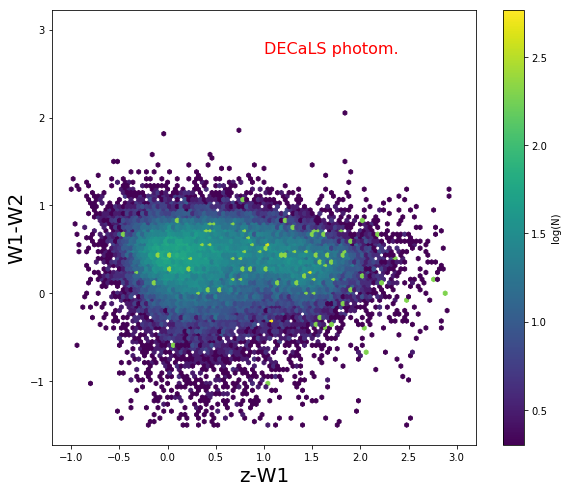

In [39]:
# DECaLS Photometry
col0 = zmag - w1mag   #z-W1 color 
col1 = w1mag - w2mag  #W1-W2 color

ok1 = (result['snr_z'] > 5) & (result['snr_w1'] > 5) # selections

# 2D-histogram of objects
fig, ax1 = plt.subplots(1, 1, figsize=(9.5, 8))
im1 = ax1.hexbin(col0[ok1], col1[ok1], bins='log', cmap=plt.cm.viridis, gridsize=100,
               mincnt=1, extent=(-1., 3, -1.5, 3))
ax1.set_xlabel('z-W1',fontsize=20)
ax1.set_ylabel('W1-W2',fontsize=20)
ax1.text(0.5,0.9,'DECaLS photom.',transform=ax1.transAxes,fontsize=16,color='red')

#color bar
cb = plt.colorbar(im1,label='log(N)')
plt.show()

Some "hot pixels" with spikes of points. Are those due to precision/rounding of fluxes and/or magnitudes? Look at histograms of z-W1 color and W1 magnitudes next.

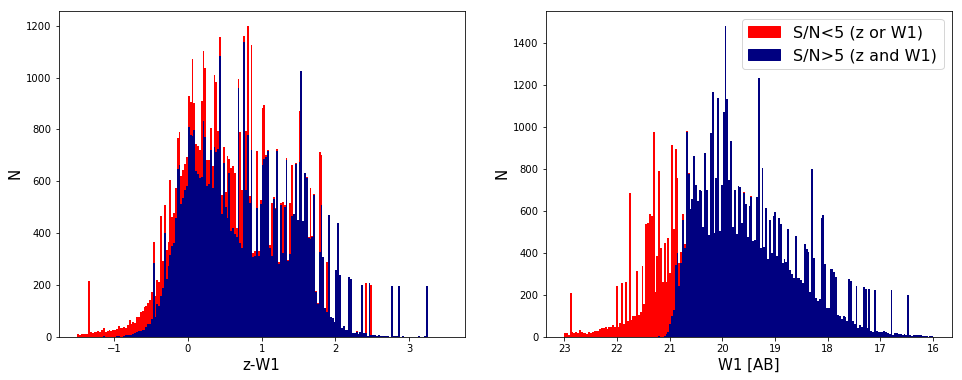

In [53]:
# Histograms for DECaLS photometry
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plt1 = ax1.hist(col0,bins=200,range=(-1.5,3.5),color='red')
ax1.set_ylabel('N',fontsize=15)
ax1.set_xlabel('z-W1',fontsize=15)
oplt1 = ax1.hist(col0[ok1],bins=200,range=(-1.5,3.5),color='navy')

# Second plot
plt2 = ax2.hist(w1mag,bins=200,range=(16,23),color='red')
ax2.set_ylabel('N',fontsize=15)
ax2.set_xlabel('W1 [AB]',fontsize=15)
ax2.set_xlim(reversed(ax2.set_xlim()))  #flip x-axis
oplt2 = ax2.hist(w1mag[ok1],bins=200,range=(16,23),color='navy')

# Legend
gray_patch = mpatches.Patch(color='red', label='S/N<5 (z or W1)')
navy_patch  = mpatches.Patch(color='navy', label='S/N>5 (z and W1)')
plt.legend(handles=[gray_patch,navy_patch],fontsize=16)

plt.show()

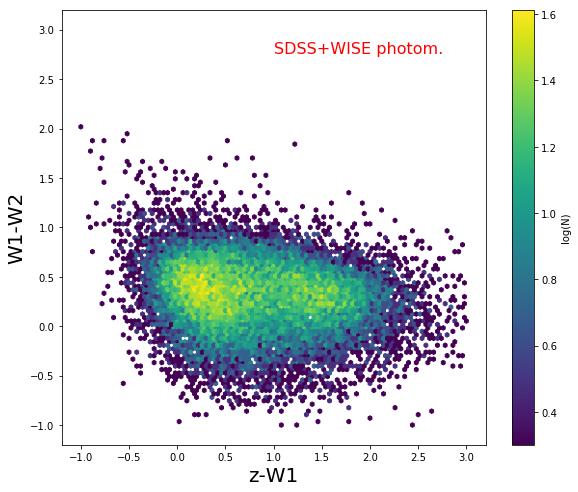

In [64]:
# SDSS
s_zmag = result['s_zmag']           #AB asinh mag (convert to log mag?)
s_w1mag = result['s_w1mag']+2.699   #convert from Vega to AB
s_w2mag = result['s_w2mag']+3.339   #convert from Vega to AB

col0 = s_zmag-s_w1mag   #z-W1 color
col1 = s_w1mag-s_w2mag  #W1-W2 color

# Not yet a SDSS equivalent(!) --> IMPLEMENT?
#ok1 = (result['snr_z'] > 5) & (result['snr_w1'] > 5) & (result['snr_w2'] > 5) # selections

# 2D-histogram of objects
fig, ax1 = plt.subplots(1, 1, figsize=(9.5, 8))
im1 = ax1.hexbin(col0, col1, bins='log', cmap=plt.cm.viridis, gridsize=100,
               mincnt=1, extent=(-1., 3, -1., 3))
ax1.set_ylabel('W1-W2',fontsize=20)
ax1.set_xlabel('z-W1',fontsize=20)
ax1.text(0.5,0.9,'SDSS+WISE photom.',transform=ax1.transAxes,fontsize=16,color='red')

#color bar
cb = plt.colorbar(im1,label='log(N)')
plt.show()

%

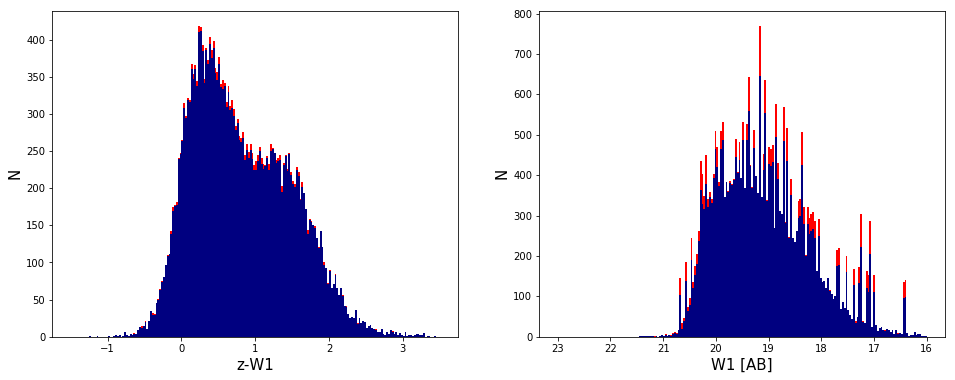

In [65]:
# Histograms for DECaLS photometry
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plt1 = ax1.hist(col0,bins=200,range=(-1.5,3.5),color='red')
ax1.set_ylabel('N',fontsize=15)
ax1.set_xlabel('z-W1',fontsize=15)
oplt1 = ax1.hist(col0[ok1],bins=200,range=(-1.5,3.5),color='navy')

plt2 = ax2.hist(s_w1mag,bins=200,range=(16,23),color='red')
ax2.set_ylabel('N',fontsize=15)
ax2.set_xlabel('W1 [AB]',fontsize=15)
ax2.set_xlim(reversed(ax2.set_xlim()))  #flip x-axis
oplt2 = ax2.hist(s_w1mag[ok1],bins=200,range=(16,23),color='navy')

plt.show()

## Magnitude comparison between DECaLS & SDSS/eBOSS]

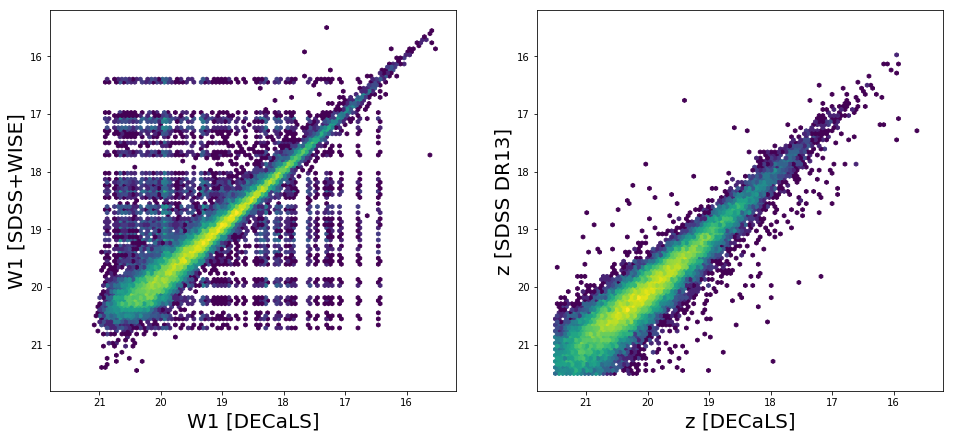

In [66]:
# 2D-histogram of objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
im1 = ax1.hexbin(w1mag[ok1], s_w1mag[ok1], bins='log', cmap=plt.cm.viridis, gridsize=100,
               mincnt=1, extent=(15.5, 21.5, 15.5, 21.5))
ax1.set_ylabel('W1 [SDSS+WISE]',fontsize=20)
ax1.set_xlabel('W1 [DECaLS]',fontsize=20)

ax1.set_xlim(reversed(ax1.set_xlim()))  #flip x-axis
ax1.set_ylim(reversed(ax1.set_ylim()))  #flip y-axis


im2 = ax2.hexbin(zmag[ok1], s_zmag[ok1], bins='log', cmap=plt.cm.viridis, gridsize=100,
               mincnt=1, extent=(15.5, 21.5, 15.5, 21.5))
ax2.set_ylabel('z [SDSS DR13]',fontsize=20)
ax2.set_xlabel('z [DECaLS]',fontsize=20)

ax2.set_xlim(reversed(ax2.set_xlim()))  #flip x-axis
ax2.set_ylim(reversed(ax2.set_ylim()))  #flip y-axis

plt.show()

## Hack Ideas

1. Combine DECaLS measurements of photometry, color and/or type with spectroscopic information (redshift, emission lines, etc.)

2. Make multiple panel comparison plots for photometry (check asinh to log conversion); add one-on-one lines, etc.

3. Comparison between DECaLS photometry and SDSS photometry systematically for all bands, and for multiple object types (QSO, star, galaxies).